In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt

In [2]:
# seed for reproducibility
my_seed = 1980

In [3]:
# read data
my_path = '../'

In [4]:
train = my_path + 'data/c5_e4_1_train.svm'
test = my_path + 'data/c5_e4_1_test.svm'
test_csv = my_path + 'data/c5_e3_1_test.csv'
db = my_path + 'data/c5_e6_train.db'
pred = my_path + 'data/pred'

In [5]:
test_pd = pd.read_csv(test_csv)

hces-bag models options:

*    sgd     : Stochastic Gradient Descent
*    svc     : Support Vector Machines
*    gbc     : Gradient Boosting Classifiers
*    dtree   : Decision Trees
*    forest  : Random Forests
*    extra   : Extra Trees
*    kmp     : KMeans->LogisticRegression Pipelines
*    kernp   : Nystroem Approx->Logistic Regression Pipelines
*    dl      : Deep Learning
*    sm      : KNN Hot Deck (Statistical Matching)

In [6]:
%%bash -s "$db" "$train"
rm $1
python pyensemble/ensemble_train.py -M sgd forest gbc dl -F 5 -S f1  $1 $2 -U -v

Train/hillclimbing set size: 326899
              Test set size: 980700

Building SGDClassifier models
Building RandomForestClassifier models
Building GradientBoostingClassifier models
Building MLPClassifier models
built 78 models

fitting ensemble:
EnsembleSelectionClassifier(bag_fraction=0.25,
              db_file='/media/mourao/BACKUP/renda_presumida/data/c5_e6_train.db',
              epsilon=0.0001, max_models=25,
              models=[SGDClassifier(alpha=0.000819600824639, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle...e=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)],
              n_bags=20, n_best=5, n_folds=5, prune_fraction=0.75,
              random_state=None, score_metric='f1', use_bootstrap=True,
              use_

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)

fitting models:
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to m

In [7]:
clas = !python pyensemble/ensemble_predict.py -s ens {db} {test}
guess = [int(i) for i in clas if i == '0' or i == '1']
fused = pd.concat([test_pd, pd.Series(guess, name='guess')], axis=1)  

cm = confusion_matrix(fused['label'], fused['guess'])
print(classification_report(fused['label'], fused['guess']))
print('Confusion Matrix:\n\n ' + str(cm))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90   2556691
          1       0.37      0.88      0.52    295770

avg / total       0.92      0.83      0.86   2852461

Confusion Matrix:

 [[2115323  441368]
 [  36230  259540]]


In [8]:
pred = !python pyensemble/ensemble_predict.py -s ens -p {db} {test}

In [9]:
ls = []
for i, l in enumerate(pred):
    try:
        neg, pos = l.split()
        
        neg = float(neg)
        pos = float(pos)
        
        ls.append({'p0': neg, 'p1': pos}) 
    except ValueError:
        pass
    
predictions = pd.DataFrame(ls)
predictions = pd.concat([predictions, fused['label']], axis=1)
predictions

,p0,p1,label
0,0.71835,0.28165,0
1,0.56803,0.43197,0
2,0.87429,0.12571,0
3,0.71299,0.28701,0
4,0.87452,0.12548,0
5,0.90541,0.09459,0
6,0.92622,0.07378,0
7,0.97406,0.02594,0
8,0.98822,0.01178,0
9,0.87596,0.12404,0


In [10]:
fpr, tpr, thresholds = roc_curve(predictions['label'], predictions['p1'])

In [11]:
my_auc = auc(fpr, tpr)
my_auc

0.9285991291632691

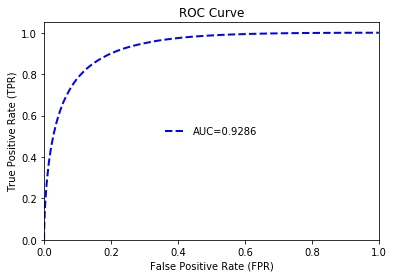

In [12]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='AUC=%0.4f' % my_auc, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="center",  frameon=False)
plt.show()